# Cleaning the records

In this Jupyter Notebook, we will execute the cleaning of our dataset.

Instructions: To run this notebook is required to have a the data/gen/merged.csv file. Generate it using the merge.ipynb


In [178]:
# Importing the libraries
import pandas as pd
import seaborn as sns  # Para visualización de datos mas avanzada
%matplotlib inline
import matplotlib.pyplot as plt # Para visualización de datos

In [179]:
# Constants for the resources
DATA_FILE = 'data/gen/merged.csv'
LABELS_FILE = 'data/labels/labels.csv'

In [180]:
df_labels = pd.read_csv(LABELS_FILE, delimiter='|')

In [181]:
# Importing the dataset
df = pd.read_csv(DATA_FILE)
df.head()

C:\Users\chama\AppData\Local\Temp\ipykernel_39212\947250292.py:2: DtypeWarning: Columns (3,6,26,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_FILE)


,ANO_EMISION,MES_EMISION,DIA_EMISION,DEPTO_MCPIO,QUIEN_REPORTA,VIC_SEXO,VIC_EDAD,TOTAL_HIJOS,NUM_HIJ_HOM,NUM_HIJ_MUJ,...,AGR_OCUP,AGR_DEDICA,AGRESORES_OTROS_TOTAL,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS,INST_DENUN_HECHO,MEDIDAS_SEGURIDAD,LEY_APLICABLE
0,2013.0,Enero,22.0,Guatemala,Víctima,Mujeres,38,02,01,01,...,Ocupaciones ignoradas,NaN,Ninguna,Ninguna,Ninguna,Ninguna,Ninguna,Organismo Judicial,Medidas otorgadas,Ambas leyes (VIF y VCM)
1,2013.0,Enero,24.0,Guatemala,Víctima,Mujeres,20,01,Ninguna,01,...,Trabajadores ambulantes de servicios y afines,NaN,Ignorado,99.0,99.0,99.0,99.0,Ministerio Público,NaN,NaN
2,2013.0,Enero,21.0,Guatemala,Víctima,Mujeres,21,02,01,01,...,Albañiles,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
3,2013.0,Enero,2.0,Guatemala,Víctima,Hombres,70,Ninguna,Ninguna,Ninguna,...,NaN,Quehaceres del Hogar,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN
4,2013.0,Enero,10.0,Guatemala,Víctima,Mujeres,36,Ignorado,Ignorado,Ignorado,...,Ocupaciones no especificadas en las anteriores,NaN,Ignorado,99.0,99.0,99.0,99.0,Procuraduría de los Derechos Humanos,NaN,NaN


Nota: Vemos que tenemos columnas con tipos de datos irregulares. Columnas (3,6,26,28,29)


In [182]:
df.shape

(327781, 52)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327781 entries, 0 to 327780
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_EMISION            327781 non-null  float64
 1   MES_EMISION            327781 non-null  object 
 2   DIA_EMISION            327781 non-null  float64
 3   DEPTO_MCPIO            327781 non-null  object 
 4   QUIEN_REPORTA          327781 non-null  object 
 5   VIC_SEXO               327781 non-null  object 
 6   VIC_EDAD               327781 non-null  object 
 7   TOTAL_HIJOS            326215 non-null  object 
 8   NUM_HIJ_HOM            326215 non-null  object 
 9   NUM_HIJ_MUJ            326215 non-null  object 
 10  VIC_ALFAB              327144 non-null  object 
 11  VIC_ESCOLARIDAD        327144 non-null  object 
 12  VIC_EST_CIV            326215 non-null  object 
 13  VIC_GRUPET             327781 non-null  object 
 14  VIC_NACIONAL           327781 non-nu

In [184]:
df.isnull().sum()

ANO_EMISION                   0
MES_EMISION                   0
DIA_EMISION                   0
DEPTO_MCPIO                   0
QUIEN_REPORTA                 0
VIC_SEXO                      0
VIC_EDAD                      0
TOTAL_HIJOS                1566
NUM_HIJ_HOM                1566
NUM_HIJ_MUJ                1566
VIC_ALFAB                   637
VIC_ESCOLARIDAD             637
VIC_EST_CIV                1566
VIC_GRUPET                    0
VIC_NACIONAL                  0
VIC_TRABAJA                 637
VIC_OCUP                 217775
VIC_DEDICA               111010
VIC_DISC                      0
TIPO_DISCAQ              320468
VIC_REL_AGR                   0
OTRAS_VICTIMAS                0
VIC_OTRAS_HOM                 0
VIC_OTRAS_MUJ                 0
VIC_OTRAS_N_OS                0
VIC_OTRAS_N_AS                0
HEC_DIA                       0
HEC_MES                       0
HEC_ANO                       0
HEC_DEPTOMCPIO                0
HEC_AREA                      0
HEC_TIPA

In [185]:
missing_data_percentage = df.isnull().mean() * 100  # missing data percentage
missing_data_percentage

ANO_EMISION               0.000000
MES_EMISION               0.000000
DIA_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.477758
NUM_HIJ_HOM               0.477758
NUM_HIJ_MUJ               0.477758
VIC_ALFAB                 0.194337
VIC_ESCOLARIDAD           0.194337
VIC_EST_CIV               0.477758
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.194337
VIC_OCUP                 66.439177
VIC_DEDICA               33.867125
VIC_DISC                  0.000000
TIPO_DISCAQ              97.768937
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ             0.000000
VIC_OTRAS_N_OS            0.000000
VIC_OTRAS_N_AS            0.000000
HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO             

## Eliminación de columnas difusas.


In [186]:
# Remove columns

COLUMNS_TO_REMOVE = [
    'TIPO_DISCAQ',
    'INST_DONDE_DENUNCIO',
    'MEDIDAS_SEGURIDAD'
]


df = df.drop(columns=COLUMNS_TO_REMOVE)

## Limpieza de valores pequeñas cantidades de valores nulos.


In [187]:
REMOVE_NULLS_OVER = [
    'TOTAL_HIJOS',
    'NUM_HIJ_HOM',
    'NUM_HIJ_MUJ',
    'VIC_ALFAB',
    'VIC_ESCOLARIDAD',
    'VIC_EST_CIV',
    'VIC_TRABAJA',
    'AGR_EST_CIV',
]
# Remove the rows with nulls in the specified columns
df = df.dropna(subset=REMOVE_NULLS_OVER)

In [188]:
df['TOTAL_HIJOS'].value_counts()

TOTAL_HIJOS
01          73627
02          67401
Ignorado    61918
03          43917
Ninguna     36866
04          20426
05          10582
06           4950
07           2912
08           1682
09            822
10            558
11            252
12            182
13             56
14             25
15             15
16              7
17              4
19              1
Name: count, dtype: int64

## Conversión de datos


#### Convierte la columna `VIC_EDAD` de tipo numérico


In [189]:
df['VIC_EDAD'] = pd.to_numeric(df['VIC_EDAD'], errors='coerce')
df['VIC_EDAD'] = df['VIC_EDAD'].fillna(98)

#### Hace la columna AGR_EDAD de tipo numérico


In [190]:
df['AGR_EDAD'] = pd.to_numeric(df['AGR_EDAD'], errors='coerce')
df['AGR_EDAD'] = df['AGR_EDAD'].fillna(98)

#### Hacer la columna HEC_DIA de tipo numérico


In [191]:
df['HEC_DIA'] = pd.to_numeric(df['HEC_DIA'], errors='coerce')
df['HEC_DIA'] = df['HEC_DIA'].fillna(99)

#### Hacer columna `MES_EMISION` a tipo numérico


In [192]:
# Diccionario para convertir los nombres de los meses a números
month_dict = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Reemplazar los nombres de los meses por números
df['MES_EMISION'] = df['MES_EMISION'].str.lower().map(month_dict)

#### Hacer columna `HEC_MES` a tipo numérico


In [193]:
month_dict = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12, 'ignorado': 99
}
df['HEC_MES'] = df['HEC_MES'].str.lower().map(month_dict)

#### Hacer columna `HEC_ANO` a tipo numérico


In [194]:
df['HEC_ANO'].replace('Ignorado', 9999)
df['HEC_ANO'] = pd.to_numeric(df['HEC_ANO'], errors='coerce')
df['HEC_ANO'] = df['HEC_ANO'].fillna(9999)

## Estandarizar datos


#### Unificamos las columnas `AGR_DEDICA` y `AGR_OCUP`


In [195]:

df['AGR_DEDICA'] = df['AGR_DEDICA'].fillna('') + df['AGR_OCUP'].fillna('')
df['VIC_DEDICA'] = df['VIC_DEDICA'].fillna('') + df['VIC_OCUP'].fillna('')

# Eliminar las columnas que ya no necesitamos
df = df.drop(columns=['AGR_OCUP', 'VIC_OCUP'])

# Quitar los registros que no tienen información de ocupación
df = df[df['VIC_DEDICA'].str.strip().astype(bool)]
df = df[df['AGR_DEDICA'].str.strip().astype(bool)]

#### Unifica `ANO_EMISION`, `MES_EMISION` y `DIA_EMISION` en una nueva columna.


In [196]:
# Casteo de las columnas
df['ANO_EMISION'] = df['ANO_EMISION'].astype(int)
df['DIA_EMISION'] = df['DIA_EMISION'].astype(int)

# Renombrar las columnas para que sean asignadas correctamente
df_temp = df.rename(columns={'ANO_EMISION': 'year',
                    'MES_EMISION': 'month', 'DIA_EMISION': 'day'})

# Combina las columnas year, month, day en una sola columna
df['FECHA_EMISION'] = pd.to_datetime(df_temp[['year', 'month', 'day']])

#### Unifica `ANO_HEC`, `MES_HEC` y `DIA_HEC` en una nueva columna.


In [197]:
# Casteo de las columnas
df['HEC_ANO'] = df['HEC_ANO'].astype(int)
df['HEC_DIA'] = df['HEC_DIA'].astype(int)
# df['HEC_MES'].value_counts()
# Renombrar las columnas para que sean asignadas correctamente
df_temp = df.rename(columns={'HEC_ANO': 'year',
                    'HEC_MES': 'month', 'HEC_DIA': 'day'})


# Combina las columnas year, month, day en una sola columna
df['FECHA_HECHO'] = pd.to_datetime(
    df_temp[['year', 'month', 'day']], errors='coerce')

#### Estandarizamos `DEPTO_MCPIO` para utilizar etiquetas y no identificadores.


In [198]:
dptoDict = {
    '1': 'guatemala',
    '2': 'el progreso',
    '3': 'sacatepéquez',
    '4': 'chimaltenango',
    '5': 'escuintla',
    '6': 'santa rosa',
    '7': 'sololá',
    '8': 'totonicapán',
    '9': 'quetzaltenango',
    '10': 'suchitepéquez',
    '11': 'retalhuleu',
    '12': 'san marcos',
    '13': 'huehuetenango',
    '14': 'quiché',
    '15': 'baja verapaz',
    '16': 'alta verapaz',
    '17': 'petén',
    '18': 'izabal',
    '19': 'zacapa',
    '20': 'chiquimula',
    '21': 'jalapa',
    '22': 'jutiapa'
}

In [199]:
typosDict = {
    'san miguel uspantán': 'uspantán',
    'santiago chimaltenanango': 'santiago chimaltenango',
    'quezaltepeque': 'quetzaltepeque',
    'san ildefonso ixtahuacán': 'ixtahuacán',
    'san josé el golfo': 'san josé del golfo',
    'santiago sactepéquez': 'santiago sacatepéquez',
    'san miguel sigüilá': 'san miguel siguilá',
    'ixtahucán': 'ixtahuacán',
    'san joseé la máquina': 'san josé la máquina',
    'san josé pinulac': 'san josé pinula',
    'san bartalomé jocotenango': 'san bartolomé jocotenango',
    'san juan ostuncalco': 'ostuncalco',
    'san andres semetabaj': 'san andrés semetabaj',
    'melchor':  'melchor de mencos',
    'santa lucia utatlán': 'santa lucía utatlán',
    'la democaracia': 'la democracia',
    'petatan': 'petatán',
    'san cristobal acasaguastlán': 'san cristóbal acasaguastlán',
    'santa catalina ixtahuacán': 'santa catarina ixtahuacán',
    'san lucía la reforma': 'santa lucía la reforma',
    'san luis jilitepeque': 'san luis jilotepeque',
    'san cristobal totonicapán': 'san cristóbal totonicapán',
    'monostenango': 'momostenango',
    'san jose la máquina': 'san josé la máquina',
    'río blanco': 'rio blanco',
    'san lucas tolimán': 'san lucas toliman',
    'san juan ermita': 'san juan erminta',
    'san cristóbal acasaguastlan': 'san cristóbal acasaguastlán',
    'chaperico': 'champerico',
    'guanazapa': 'guanagazapa',
    'quezada': 'quesada',
    'san raimundo': 'san raymundo',
    'santa catarina ixtahucán': 'santa catarina ixtahuacán',
    'san josé el idolo': 'san josé el ídolo',
    'raxujà': 'raxruhá',
    'san rafael pié de la cuesta': 'san rafael pie de la cuesta',
    'río bravo': 'rio bravo',
    'la tinta': 'santa catalina la tinta',
    'san agustín acasaguastlan': 'san agustín acasaguastlán',
    'san catalina la tinta': 'santa catalina la tinta',
    'huehuetenago': 'huehuetenango',
}

In [200]:
# Paso 1: Utilizando df_labels obtenemos las filas donde Código es ANO_EMISION
df_util_labels = df_labels[df_labels['Código'] == 'DEPTO_MCPIO'].copy()
# Paso 2: Para df 'DEPTO_MCPIO' casteamos a string, hacemos strip y todo a minúsculas
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].astype(str).str.strip().str.lower()

# Paso 3: Para cualquier variable en 'DEPTO_MCPIO' que tenga '.' obtenemos solo el primer valor
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].str.split('.').str[0]

# Paso 4: Utilizando df_util_labels, casteamos Valor y Etiqueta a string
df_util_labels['Valor'] = df_util_labels['Valor'].astype(str)
df_util_labels['Etiqueta'] = df_util_labels['Etiqueta'].astype(
    str).str.strip().str.lower()

# Paso 5: Repetimos, para cualquier valor en 'Valor' que tenga '.' obtenemos solo el primer valor
df_util_labels['Valor'] = df_util_labels['Valor'].str.split('.').str[0]

# Paso 6: Dado que los DEPTO_MCPIO tiene valores mezclados de Valor y Etiqueta
# Procedemos a estandarizar DEPTO_MCPIO solo con los valores de Etiqueta
# Osea si en DEPTO_MCPIO encontramos un valor que está en Valor, lo reemplazamos por el valor de Etiqueta
# Si no entonces dejamos el valor original

# Crear un diccionario de mapeo de 'Valor' a 'Etiqueta'
map_dict_valor = df_util_labels.set_index('Valor')['Etiqueta'].to_dict()

map_dict_etiqueta = df_util_labels.set_index('Etiqueta')['Valor'].to_dict()

# Aplicar el mapeo a la columna 'DEPTO_MCPIO'. Si un valor no se encuentra en el diccionario, se deja como está.
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].map(lambda x: map_dict_valor.get(x, x))
# Using the typosDict we will replace the typos in the DEPTO_MCPIO column
df['DEPTO_MCPIO'] = df['DEPTO_MCPIO'].map(lambda x: typosDict.get(x, x))

# Creamos una nueva columna mapeando DEPTO_MCPIO a su código
df['DEPTO_MCPIO_CODIGO'] = df['DEPTO_MCPIO'].map(
    lambda x: map_dict_etiqueta.get(x, x))

# Now generate a new REG_DEPTO column

# For this do the next.
# For the DEPTO_MCPIO_CODIGO column, if the column has a length of 3, then we take the first character
# If the column has a length of 4, then we take the first two characters
# This characters will be used to map the department to its name using the dptoDict dictionary

df['REG_DPTO'] = df['DEPTO_MCPIO_CODIGO'].apply(
    lambda x: dptoDict.get(x[0], x) if len(x) == 3 else dptoDict.get(x[:2], x))

# Remove DEPTO_MCPIO_CODIGO column
df = df.drop(columns=['DEPTO_MCPIO_CODIGO'])
# Rename DEPTO_MCPIO to REG_MCPIO
df = df.rename(columns={'DEPTO_MCPIO': 'REG_MCPIO'})

#### Estandarizamos `HEC_DEPTOMCPIO` para utilizar etiquetas y no identificadores.


In [201]:
dptoDict = {
    '1': 'guatemala',
    '2': 'el progreso',
    '3': 'sacatepéquez',
    '4': 'chimaltenango',
    '5': 'escuintla',
    '6': 'santa rosa',
    '7': 'sololá',
    '8': 'totonicapán',
    '9': 'quetzaltenango',
    '10': 'suchitepéquez',
    '11': 'retalhuleu',
    '12': 'san marcos',
    '13': 'huehuetenango',
    '14': 'quiché',
    '15': 'baja verapaz',
    '16': 'alta verapaz',
    '17': 'petén',
    '18': 'izabal',
    '19': 'zacapa',
    '20': 'chiquimula',
    '21': 'jalapa',
    '22': 'jutiapa',
    '99': 'ignorado'
}

In [202]:
typosDict = {
    '9999': 'ignorado',
    'río bravo': 'rio bravo',
    'san josé el idolo': 'san josé el ídolo',
    'san rafael pié de la cuesta': 'san rafael pie de la cuesta',
    'san catalina la tinta': 'santa catalina la tinta',
    'la tinta': 'santa catalina la tinta',
    'san lucas tolimán': 'san lucas toliman',
    'río blanco': 'rio blanco',
    'san juan ermita': 'san juan erminta',
    'quezaltepeque': 'quetzaltepeque',
    'santa catarina ixtahucán': 'santa catarina ixtahuacán',
    'quezada': 'quesada',
    'guanazapa': 'guanagazapa',
    'san miguel sigüilá': 'san miguel siguilá',
    'santa catalina ixtahuacán': 'santa catarina ixtahuacán',
    'san lucía la reforma': 'santa lucía la reforma',
    'la democaracia': 'la democracia',
    'ixtahucán': 'ixtahuacán',
    'melchor': 'melchor de mencos',
    'san juan ostuncalco': 'ostuncalco',
    'san ildefonso ixtahuacán': 'ixtahuacán',
    'san miguel uspantán': 'uspantán',
    'chaperico': 'champerico',
    'san agustín acasaguastlan': 'san agustín acasaguastlán',
    'san miguel uspantán': 'uspantán',
    'santiago chimaltenanango': 'santiago chimaltenango',
    'quezaltepeque': 'quetzaltepeque',
    'san ildefonso ixtahuacán': 'ixtahuacán',
    'san josé el golfo': 'san josé del golfo',
    'santiago sactepéquez': 'santiago sacatepéquez',
    'san miguel sigüilá': 'san miguel siguilá',
    'ixtahucán': 'ixtahuacán',
    'san joseé la máquina': 'san josé la máquina',
    'san josé pinulac': 'san josé pinula',
    'san bartalomé jocotenango': 'san bartolomé jocotenango',
    'san juan ostuncalco': 'ostuncalco',
    'san andres semetabaj': 'san andrés semetabaj',
    'melchor':  'melchor de mencos',
    'santa lucia utatlán': 'santa lucía utatlán',
    'la democaracia': 'la democracia',
    'petatan': 'petatán',
    'san cristobal acasaguastlán': 'san cristóbal acasaguastlán',
    'santa catalina ixtahuacán': 'santa catarina ixtahuacán',
    'san lucía la reforma': 'santa lucía la reforma',
    'san luis jilitepeque': 'san luis jilotepeque',
    'san cristobal totonicapán': 'san cristóbal totonicapán',
    'monostenango': 'momostenango',
    'san jose la máquina': 'san josé la máquina',
    'río blanco': 'rio blanco',
    'san lucas tolimán': 'san lucas toliman',
    'san juan ermita': 'san juan erminta',
    'san cristóbal acasaguastlan': 'san cristóbal acasaguastlán',
    'chaperico': 'champerico',
    'guanazapa': 'guanagazapa',
    'quezada': 'quesada',
    'san raimundo': 'san raymundo',
    'santa catarina ixtahucán': 'santa catarina ixtahuacán',
    'san josé el idolo': 'san josé el ídolo',
    'raxujà': 'raxruhá',
    'san rafael pié de la cuesta': 'san rafael pie de la cuesta',
    'río bravo': 'rio bravo',
    'la tinta': 'santa catalina la tinta',
    'san agustín acasaguastlan': 'san agustín acasaguastlán',
    'san catalina la tinta': 'santa catalina la tinta',
    'huehuetenago': 'huehuetenango',
}

In [203]:
# Paso 1: Utilizando df_labels obtenemos las filas donde Código es ANO_EMISION
df_util_labels = df_labels[df_labels['Código'] == 'HEC_DEPTOMCPIO'].copy()
# Paso 2: Para df 'HEC_DEPTOMCPIO' casteamos a string, hacemos strip y todo a minúsculas
df['HEC_DEPTOMCPIO'] = df['HEC_DEPTOMCPIO'].astype(str).str.strip().str.lower()

# Paso 3: Para cualquier variable en 'HEC_DEPTOMCPIO' que tenga '.' obtenemos solo el primer valor
df['HEC_DEPTOMCPIO'] = df['HEC_DEPTOMCPIO'].str.split('.').str[0]

# Paso 4: Utilizando df_util_labels, casteamos Valor y Etiqueta a string
df_util_labels['Valor'] = df_util_labels['Valor'].astype(str)
df_util_labels['Etiqueta'] = df_util_labels['Etiqueta'].astype(
    str).str.strip().str.lower()

# Paso 5: Repetimos, para cualquier valor en 'Valor' que tenga '.' obtenemos solo el primer valor
df_util_labels['Valor'] = df_util_labels['Valor'].str.split('.').str[0]

# Paso 6: Dado que los HEC_DEPTOMCPIO tiene valores mezclados de Valor y Etiqueta
# Procedemos a estandarizar HEC_DEPTOMCPIO solo con los valores de Etiqueta
# Osea si en HEC_DEPTOMCPIO encontramos un valor que está en Valor, lo reemplazamos por el valor de Etiqueta
# Si no entonces dejamos el valor original

# Crear un diccionario de mapeo de 'Valor' a 'Etiqueta'
map_dict_valor = df_util_labels.set_index('Valor')['Etiqueta'].to_dict()

map_dict_etiqueta = df_util_labels.set_index('Etiqueta')['Valor'].to_dict()
# Aplicar el mapeo a la columna 'HEC_DEPTOMCPIO'. Si un valor no se encuentra en el diccionario, se deja como está.
df['HEC_DEPTOMCPIO'] = df['HEC_DEPTOMCPIO'].map(
    lambda x: map_dict_valor.get(x, x))
# Using the typosDict we will replace the typos in the HEC_DEPTOMCPIO column
df['HEC_DEPTOMCPIO'] = df['HEC_DEPTOMCPIO'].map(lambda x: typosDict.get(x, x))

# Creamos una nueva columna mapeando HEC_DEPTOMCPIO a su código
df['HEC_DEPTOMCPIO_CODIGO'] = df['HEC_DEPTOMCPIO'].map(
    lambda x: map_dict_etiqueta.get(x, x))


df['HEC_DPTO'] = df['HEC_DEPTOMCPIO_CODIGO'].apply(
    lambda x: dptoDict.get(x[0], x) if len(x) == 3 else dptoDict.get(x[:2], x))

In [204]:
df = df.drop(columns=['HEC_DEPTOMCPIO_CODIGO'])

In [205]:
df = df.rename(columns={'HEC_DEPTOMCPIO': 'HEC_MCPIO'})

Nota: Existen 340 municipios distintos en ambos casos, sin embargo vemos que obtuvimos 347 tipos. Esto podría ser causado por errores ortográficos.


#### `VIC_ALFAB` y `AGR_ALFAB`


In [208]:
df['VIC_ALFAB'].replace('Alfabeta', 'Si', inplace=True)
df['VIC_ALFAB'].replace('Analfabeta', 'No',  inplace=True)


df['AGR_ALFAB'].replace('Alfabeta', 'Si', inplace=True)


df['AGR_ALFAB'].replace('Analfabeta', 'No',  inplace=True)

#### `VIC_ESCOLARIDAD` y `AGR_ESCOLARIDAD`


In [209]:
df['VIC_ESCOLARIDAD'].replace('Ninguna', 10)
df['VIC_ESCOLARIDAD'].replace('Ignorado', 99)
df['VIC_ESCOLARIDAD'] = pd.to_numeric(df['VIC_ESCOLARIDAD'], errors='coerce')
df['VIC_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

df['AGR_ESCOLARIDAD'].replace('Ninguna', 10)
df['AGR_ESCOLARIDAD'].replace('Ignorado', 99)
df['AGR_ESCOLARIDAD'] = pd.to_numeric(df['AGR_ESCOLARIDAD'], errors='coerce')
df['AGR_ESCOLARIDAD'] = df['VIC_ESCOLARIDAD'].fillna(99)

#### `TOTAL_HIJOS`, `NUM_HIJ_HOM`, `NUM_HIJ_MUJ`


In [210]:
df['TOTAL_HIJOS'].replace('Ignorado', 99, inplace=True)
df['TOTAL_HIJOS'].replace('Ninguna', 0, inplace=True)
# To numeric
df['TOTAL_HIJOS'] = pd.to_numeric(df['TOTAL_HIJOS'], errors='coerce')
df['TOTAL_HIJOS'] = df['TOTAL_HIJOS'].fillna(99)  # This means unknown

df['NUM_HIJ_HOM'].replace('Ignorado', 99, inplace=True)
df['NUM_HIJ_HOM'].replace('Ninguna', 0, inplace=True)
# To numeric
df['NUM_HIJ_HOM'] = pd.to_numeric(df['NUM_HIJ_HOM'], errors='coerce')
df['NUM_HIJ_HOM'] = df['NUM_HIJ_HOM'].fillna(99)  # This means unknown

df['NUM_HIJ_MUJ'].replace('Ignorado', 99, inplace=True)
df['NUM_HIJ_MUJ'].replace('Ninguna', 0, inplace=True)
# To numeric
df['NUM_HIJ_MUJ'] = pd.to_numeric(df['NUM_HIJ_MUJ'], errors='coerce')
df['NUM_HIJ_MUJ'] = df['NUM_HIJ_MUJ'].fillna(99)  # This means unknown

#### `VIC_TRABAJA` y `AGR_TRABAJA`


In [211]:
df['VIC_TRABAJA'].replace(
    'Si trabaja por un salario o ingreso', 'Si', inplace=True)
df['VIC_TRABAJA'].replace(
    'No trabaja por un salario o ingreso', 'No', inplace=True)

df['AGR_TRABAJA'].replace(
    'Si trabaja por un salario o ingreso', 'Si', inplace=True)
df['AGR_TRABAJA'].replace(
    'No trabaja por un salario o ingreso', 'No', inplace=True)

#### `AGRESORES_OTROS_TOTAL`


In [212]:
df['AGRESORES_OTROS_TOTAL'].replace('Ignorado', 99, inplace=True)
df['AGRESORES_OTROS_TOTAL'].replace('Ninguna', 0, inplace=True)
df['AGRESORES_OTROS_TOTAL'] = pd.to_numeric(
    df['AGRESORES_OTROS_TOTAL'], errors='coerce')

#### `OTRAS_VICTIMAS`


In [213]:
df['OTRAS_VICTIMAS'].replace('Ignorado', 99, inplace=True)
df['OTRAS_VICTIMAS'].replace('Ninguna', 0, inplace=True)
df['OTRAS_VICTIMAS'] = pd.to_numeric(
    df['OTRAS_VICTIMAS'], errors='coerce')

#### `AGR_OTROS_HOM` y `AGR_OTRAS_MUJ` y `AGR_OTROS_N_OS` y `AGR_OTRAS_N_AS`


In [214]:
df['AGR_OTROS_HOM'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_HOM'] = pd.to_numeric(df['AGR_OTROS_HOM'], errors='coerce')

df['AGR_OTRAS_MUJ'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_MUJ'] = pd.to_numeric(df['AGR_OTRAS_MUJ'], errors='coerce')

df['AGR_OTROS_N_OS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTROS_N_OS'] = pd.to_numeric(df['AGR_OTROS_N_OS'], errors='coerce')

df['AGR_OTRAS_N_AS'].replace('Ninguna', 0, inplace=True)
df['AGR_OTRAS_N_AS'] = pd.to_numeric(df['AGR_OTRAS_N_AS'], errors='coerce')

#### `VIC_OTRAS_HOM` y `VIC_OTRAS_MUJ` y `VIC_OTRAS_N_OS` y `VIC_OTRAS_N_AS`


In [215]:
df['VIC_OTRAS_HOM'].replace('Ninguna', 0, inplace=True)
df['VIC_OTRAS_HOM'] = pd.to_numeric(df['VIC_OTRAS_HOM'], errors='coerce')

df['VIC_OTRAS_MUJ'].replace('Ninguna', 0, inplace=True)
df['VIC_OTRAS_MUJ'] = pd.to_numeric(df['VIC_OTRAS_MUJ'], errors='coerce')

df['VIC_OTRAS_N_OS'].replace('Ninguna', 0, inplace=True)
df['VIC_OTRAS_N_OS'] = pd.to_numeric(df['VIC_OTRAS_N_OS'], errors='coerce')

df['VIC_OTRAS_N_AS'].replace('Ninguna', 0, inplace=True)
df['VIC_OTRAS_N_AS'] = pd.to_numeric(df['VIC_OTRAS_N_AS'], errors='coerce')

#### `LEY_APLICABLE`


In [216]:
df['LEY_APLICABLE'].replace('IGNORADO', 'Ignorado', inplace=True)
df['LEY_APLICABLE'].replace('AMBAS', 'AMBAS_LEYES_VIF/VCM', inplace=True)

#### `HEC_TIPAGRE`


In [217]:
df['HEC_TIPAGRE'] = df['HEC_TIPAGRE'].str.lower().str.split('-').tolist()

## Otros


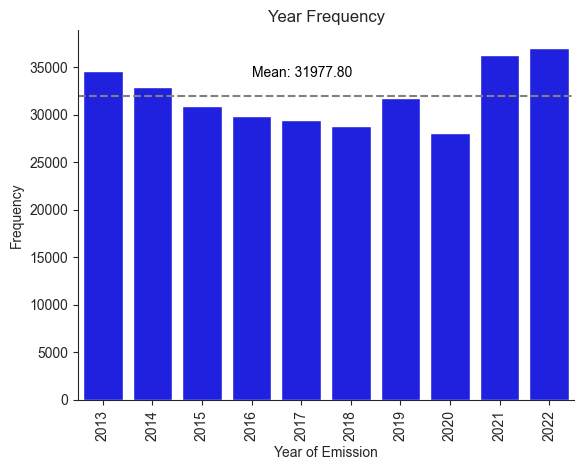

In [218]:
def year_frequency_plot(df, column_name):
    # Set the theme
    sns.set_style("ticks")

    # Calculate the year frequency
    year_frequency = df[column_name].value_counts().sort_index()
    year_frequency.index = year_frequency.index.astype(int)
    # Create a bar plot
    sns.barplot(x=year_frequency.index, y=year_frequency.values, color='b')

    # Calculate the mean of the year frequency
    mean_year = year_frequency.mean()

    # Add a horizontal line for the mean
    plt.axhline(mean_year, color='grey', linestyle='--')

    # Add a text label for the mean
    plt.text(3, mean_year + 2000, f'Mean: {mean_year:.2f}', color='black')

    # Improve the plot appearance
    plt.xlabel('Year of Emission')
    plt.ylabel('Frequency')
    plt.title('Year Frequency')
    plt.xticks(rotation=90)
    sns.despine()

    # Show the plot
    plt.show()


year_frequency_plot(df, 'ANO_EMISION')

In [219]:
# Save the cleaned data
df.to_csv('data/gen/cleaned.csv', index=False)